In [7]:
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import time
import random
from keras.preprocessing.image import ImageDataGenerator
# from image_slicer import slice

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.5.0


In [2]:
def prepare_data():
    """ 
        Prepares data.
            Coverts and combines all images to the size of (32x32) from the Chars74k Dataset and
            The CIFAR10 dataset from tensorflow.keras.datasets library.
            
            Labels Images from Chars74k dataset as 1.
            Labels Images from CIFAR10 dataset as 0.
    """
    def prepare_char74k():
        
        charset = "./datasets/charset74k/Img/GoodImg/Bmp"
        dirlist = os.listdir(charset)
        charImgList = []
        for x in dirlist:
            img_list = os.listdir(charset + "/" + x)
            for img in img_list:
                cur_img = cv2.imread(charset + "/" + x + "/" + img)
                cur_img = cv2.resize(cur_img, (32,32))
                charImgList.append(cur_img)
            print("Added: " + charset + "/" + x )
        charset = "./datasets/charset74k/Img/BadImag/Bmp"
        dirlist = os.listdir(charset)
        for x in dirlist:
            img_list = os.listdir(charset + "/" + x)
            for img in img_list:
                cur_img = cv2.imread(charset + "/" + x + "/" + img)
                cur_img = cv2.resize(cur_img, (32,32))
                charImgList.append(cur_img)
            print("Added: " + charset + "/" + x )
        print("---------IMG ADDED----------")
        charset = "./datasets/charset74k/Hnd/Img"
        dirlist = os.listdir(charset)
        for x in dirlist:
            img_list = os.listdir(charset + "/" + x)
            for img in img_list:
                cur_img = cv2.imread(charset + "/" + x + "/" + img)
                cur_img = cv2.resize(cur_img, (32,32))
                charImgList.append(cur_img)
        print("---------HAND ADDED----------")
        charset = "./datasets/charset74k/Fnt"
        dirlist = os.listdir(charset)
        for x in dirlist:
            img_list = os.listdir(charset + "/" + x)
            for img in img_list:
                cur_img = cv2.imread(charset + "/" + x + "/" + img)
                cur_img = cv2.resize(cur_img, (32,32))
                charImgList.append(cur_img)
        print("---------FONT ADDED----------")
        charImgList = np.array(charImgList)
        charImgLabels = np.ones([len(charImgList), 1])
        return (charImgList, charImgLabels)
    
    def prepare_cifar10():
        (cifx_1, _), ( cifx_2, _) = tf.keras.datasets.cifar10.load_data()
        #Taking only the Features and leaving out the labels
        cifx = np.concatenate((cifx_1, cifx_2))
#         print(cifx.shape)
        print("CIFAR10 Added")
        return (cifx, np.zeros([len(cifx), 1])) 

    char_X, char_label = prepare_char74k()
    
#     sliceImgList = []
#     l = len(char_X)
#     for _ in range(20000):
#         i = random.randrange(l)
#         j = random.randrange(l)
        
#         img1 = char_X[i]
#         img2 = char_X[j]
#         img = cv2.hconcat([img1, img2])
#         sliceImgList.append(img[:,16:47])
#         img = cv2.vconcat([img1,img2])[16:47,:]
#         sliceImgList.append(img)
#         if(len(sliceImgList)%1000 == 0):
#             print(len(sliceImgList), "In betweens")
# #     si_x = np.array(sliceImgList, dtype = object)
#     plt.imshow(sliceImgList[0])
#     si_label = np.zeros([len(si_x), 1])
    
#     sliImgList = []
#     for _ in range(10000):
#         i = random.randrange(l)
#         img1 = cv2.resize(char_X[i][:,10:32], (32,32))
#         img2 = cv2.resize(char_X[i][:,0:22], (32,32))
#         img3 = cv2.resize(char_X[i][10:32,:], (32,32))
#         img4 = cv2.resize(char_X[i][0:22,:], (32,32))
#         sliImgList.append(img1)
#         sliImgList.append(img2)
#         sliImgList.append(img3)
#         sliImgList.append(img4)
#     sli_x = np.array(sliImgList, dtype=object)
#     sli_label = np.zeros([len(sli_x), 1])
        
    (cif_X,cif_label) = prepare_cifar10()

    X = np.concatenate((char_X, cif_X))
#     X = np.concatenate((X,si_x))
#     X = np.concatenate((X,sli_x))
    Y = np.concatenate((char_label, cif_label))
#     Y = np.concatenate((Y, si_label))
#     Y = np.concatenate((Y, sli_label))
    return (X,Y)
#     return prepare_char74k()

In [3]:
from datetime import datetime
s = time.time()
print(datetime.now())

X, Y = prepare_data()

e = time.time()
print("Estimated Time : ", round(e - s, 2))

2021-06-04 03:43:32.376550
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample001
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample002
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample003
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample004
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample005
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample006
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample007
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample008
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample009
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample010
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample011
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample012
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample013
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample014
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample015
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample016
Added: ./datasets/charset74k/Img/GoodImg/Bmp/Sample017
Added: ./datasets/charset74k/Img/GoodI

In [4]:
class Config:
    test_ratio = 0.1
    validation_ratio = 0.1
    learning_rate = 0.0001
    batch_size = 64
    epochs = 10
    steps_per_epoch = 1000

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = Config.test_ratio,
                                                    random_state = 0)

In [6]:
X_train, X_vald, y_train, y_vald = train_test_split(X_train,
                                                    y_train, 
                                                    test_size = Config.validation_ratio,
                                                    random_state = 0)

In [7]:
print(X_vald.shape)
print(X_train.shape)

(9700, 32, 32, 3)
(87292, 32, 32, 3)


In [8]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

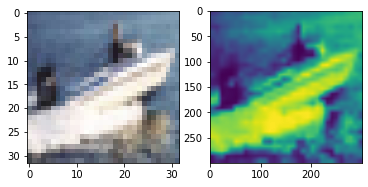

In [9]:
i = 3
img = preprocess(X_train[i])
img = cv2.resize(img, (300,300))
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(X_train[i])
axarr[1].imshow(img)

In [10]:
def one_hot(Y):
    return tf.keras.utils.to_categorical(Y)

In [11]:
y_train = one_hot(y_train)
y_vald = one_hot(y_vald)
y_test = one_hot(y_test)

In [12]:
print(X_train.shape)
print(y_train.shape)

(87292, 32, 32, 3)
(87292, 2)


In [13]:
def preprocess_arr(X):
    X = np.array(list(map(preprocess, X)))
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
    return X

In [14]:
X_train = preprocess_arr(X_train)
X_vald = preprocess_arr(X_vald)
X_test = preprocess_arr(X_test)

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(96, kernel_size = (8,8), activation = 'relu', input_shape = (32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(256, kernel_size = (8,8), activation = 'relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 96)        6240      
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 256)         1573120   
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 2, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               5

In [16]:
model.compile(tf.keras.optimizers.Adam(learning_rate = Config.learning_rate), 
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

In [17]:
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',min_delta = 0,patience = 2,mode = 'auto')

In [18]:
# dataGen = ImageDataGenerator(width_shift_range = 0.1,
#                            height_shift_range = 0.1,
#                            zoom_range = 0.2,
#                            shear_range = 0.2,
#                            rotation_range = 10)

In [19]:
# dataGen.fit(X_train)

In [20]:
# hist = model.fit_generator(dataGen.flow(X_train, y_train,
#                                        batch_size = Config.batch_size,
#                                        steps_per_epoch = Config.steps_per_epoch,
#                                        epochs = Config.epochs,
#                                        validation_data = (X_vald, y_vald),
#                                        shuffle = 1))

In [21]:
hist = model.fit(X_train, y_train , 
                 batch_size = Config.batch_size, 
                 steps_per_epoch = Config.steps_per_epoch, 
                 epochs = Config.epochs, 
                 validation_data = (X_vald, y_vald),
                 callbacks = [early_stopping])

Epoch 1/10
1000/1000 [==============================] - 216s 215ms/step - loss: 0.2463 - accuracy: 0.8981 - val_loss: 0.1606 - val_accuracy: 0.9416
Epoch 2/10
1000/1000 [==============================] - 217s 217ms/step - loss: 0.1460 - accuracy: 0.9444 - val_loss: 0.1410 - val_accuracy: 0.9472
Epoch 3/10
1000/1000 [==============================] - 215s 215ms/step - loss: 0.1112 - accuracy: 0.9587 - val_loss: 0.0951 - val_accuracy: 0.9660
Epoch 4/10
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0919 - accuracy: 0.9670 - val_loss: 0.0995 - val_accuracy: 0.9615
Epoch 5/10
1000/1000 [==============================] - 217s 217ms/step - loss: 0.0802 - accuracy: 0.9709 - val_loss: 0.0591 - val_accuracy: 0.9794
Epoch 6/10
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0679 - accuracy: 0.9759 - val_loss: 0.0620 - val_accuracy: 0.9774
Epoch 7/10
1000/1000 [==============================] - 234s 234ms/step - loss: 0.0658 - accuracy: 0.9772 - val_

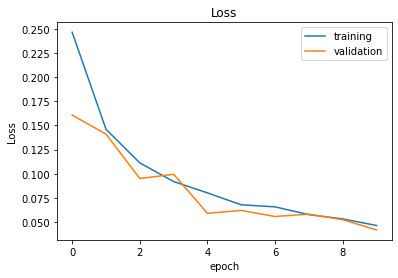

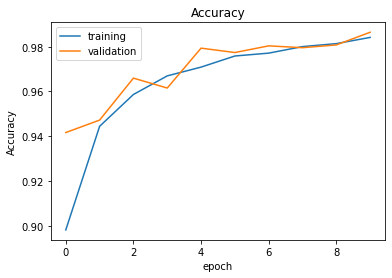

TestLoss: 0.05140545964241028 | Test Accuracy: 0.9816275238990784


In [22]:
plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.figure(2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")

plt.show()
scorce = model.evaluate(X_test, y_test, verbose = 0)
print(f'TestLoss: {scorce[0]} | Test Accuracy: {scorce[1]}')

In [43]:
model.save("./models/model2.h5") 

array([[9.9997485e-01, 2.5194407e-05]], dtype=float32)

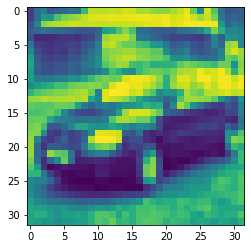

In [24]:
i = 1200
plt.imshow(X_train[i])
model.predict(X_train[i].reshape(1,32,32,1))

array([[7.2390427e-10, 1.0000000e+00]], dtype=float32)

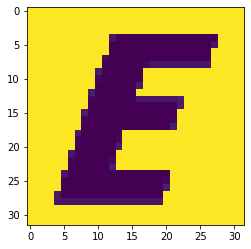

In [25]:
i = 4
plt.imshow(X_train[i])
model.predict(X_train[i].reshape(1,32,32,1))

### Making a Character OCR using Sliding Window and Image Pyramid

In [2]:
from tensorflow import keras
model = keras.models.load_model('./models/model2.h5')

In [3]:
def input_preprocess(img):
    img = cv2.resize(img, (32,32))
    img = preprocess(img)
    img = img.reshape(1,32,32,1)
    return np.array(img)

# img = cv2.imread("./download.jpg")
# img = X_train[5]
# print(model.predict(img))
# f, axarr = plt.subplots(1, 2)
# axarr[0].imshow(img)
# axarr[1].imshow(input_preprocess(img).reshape(32,32))

In [4]:
class Config:
    width = 600
    scale = 1.5
    ROI_size = (64,64) #Regoin of Interest
    min_prob = 0.99
    win_step = 16
    input_size = (32,32)
    overlap_thresh=0.3

In [5]:
##Some Helper Functions
# !pip install imutils
import imutils
from imutils.object_detection import non_max_suppression
def sliding_window(img, step, ws):
    """
        Slides a window in the image.
    """
    for y in range(0, image.shape[0] - ws[1], step):
        for x in range(0, image.shape[1] - ws[0], step):
            yield (x, y, image[y : y + ws[1], x : x + ws[0]])

def image_pyramid(image, scale = 1.5,min_size = (32,32)):
    """
        Creates a Image Pyramid of scale(default = 1.5) until min_size(default = (32,32))
    """
    yield image
    
    while True:
        #Dimension of the next image in the pyramid
        w = int(image.shape[0]/scale)
        image = imutils.resize(image, width = w)
        
        if image.shape[0] < min_size[1] or image.shape[1] < min_size[0]:
            break
        
        yield image

In [6]:
org = cv2.imread("./download.jpg")
org = imutils.resize(org, width = Config.width)
(H,W) = org.shape[:2]

NameError: name 'cv2' is not defined

In [ ]:
pyramid = image_pyramid(org, scale = Config.scale, min_size =Config.ROI_size)

In [ ]:
rois = []#Stores ROIS
locs = []#Locations of ROIS

In [ ]:
start = time.time()

for image in pyramid:
    scale = W / float(image.shape[1])
    
    for (x,y, roiOrg) in sliding_window(image, Config.win_step, Config.ROI_size):
        #SCAling
        x = int(x * scale)
        y = int(y * scale)
        w = int(Config.ROI_size[0] * scale)
        h = int(Config.ROI_size[1] * scale)
        
        roi = cv2.resize(roiOrg,Config.input_size)
        roi = input_preprocess(roi)
        
        rois.append(roi)
        locs.append((x,y, x +w, y + h))
        
#         clone = org.copy()
#         cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         cv2.imshow("VISZZ", clone)
#         cv2.imshow("ROI", roiOrg)
#         cv2.waitKey(0)
end = time.time()
print(f'Took {round(end - start,2)} s')

In [ ]:
start = time.time()
pred = []
# print(len(rois))

for roi in rois:
    pred.append(model.predict(roi))
#     if len(pred) % 50 == 0:
#         print("Processed: " + str(len(pred)) + " ROIS")

end = time.time()
print(f"This took {round(end - start, 2)}s.")

In [ ]:
P = []
for probs in pred:
    P.append(("Char", probs[0][1]))
pred = P

In [ ]:
chbox_prob = []
for (i,p) in enumerate(pred):
    (label, prob) = p
#     print(prob)
    if prob >= Config.min_prob:
        box = locs[i]
        chbox_prob.append((box, prob))

In [ ]:
from matplotlib.patches import Rectangle
plt.imshow(org)
for chbox in chbox_prob:
    box,prob = chbox
    (startX, startY, endX, endY) = box
    plt.gca().add_patch(Rectangle((startX, startY), endX - startX, endY - startY,
                                 edgecolor = 'red',
                                 facecolor = 'none',))

In [ ]:
boxes, probs = list(zip(*chbox_prob))
boxes = np.array(boxes)
probs = np.array(probs)

In [ ]:
boxes = non_max_suppression(boxes,probs,  overlapThresh=Config.overlap_thresh)

In [ ]:
plt.imshow(org)
for startX, startY, endX, endY in boxes:
    plt.gca().add_patch(Rectangle((startX, startY), endX - startX, endY - startY,
                                 edgecolor = 'red',
                                 facecolor = 'none'))